In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import SelectKBest, mutual_info_classif


In [4]:
df = pd.read_csv('credit_score.csv')

In [5]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


### Columns of our dataset

In [12]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

### Basic statistical measures for the numerical columns

In [15]:
to_describe = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
              'Delay_from_due_date','Num_Bank_Accounts']
to_describe_2 = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt',
              'Credit_Utilization_Ratio', 'Credit_History_Age']
to_describe_3 = ['Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

df[to_describe].describe()
df[to_describe_2].describe()
df[to_describe_3].describe()

,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000
mean,107.699208,55.101315,392.697586
std,132.267056,39.006932,201.652719
min,0.000000,0.000000,0.007760
25%,29.268886,27.959111,267.615983
50%,66.462304,45.156550,333.865366
75%,147.392573,71.295797,463.215683
max,1779.103254,434.191089,1183.930696


### Execution cell

In [16]:
df[to_describe_3].describe()

,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000
mean,107.699208,55.101315,392.697586
std,132.267056,39.006932,201.652719
min,0.000000,0.000000,0.007760
25%,29.268886,27.959111,267.615983
50%,66.462304,45.156550,333.865366
75%,147.392573,71.295797,463.215683
max,1779.103254,434.191089,1183.930696


### Showing the distribution of each variable

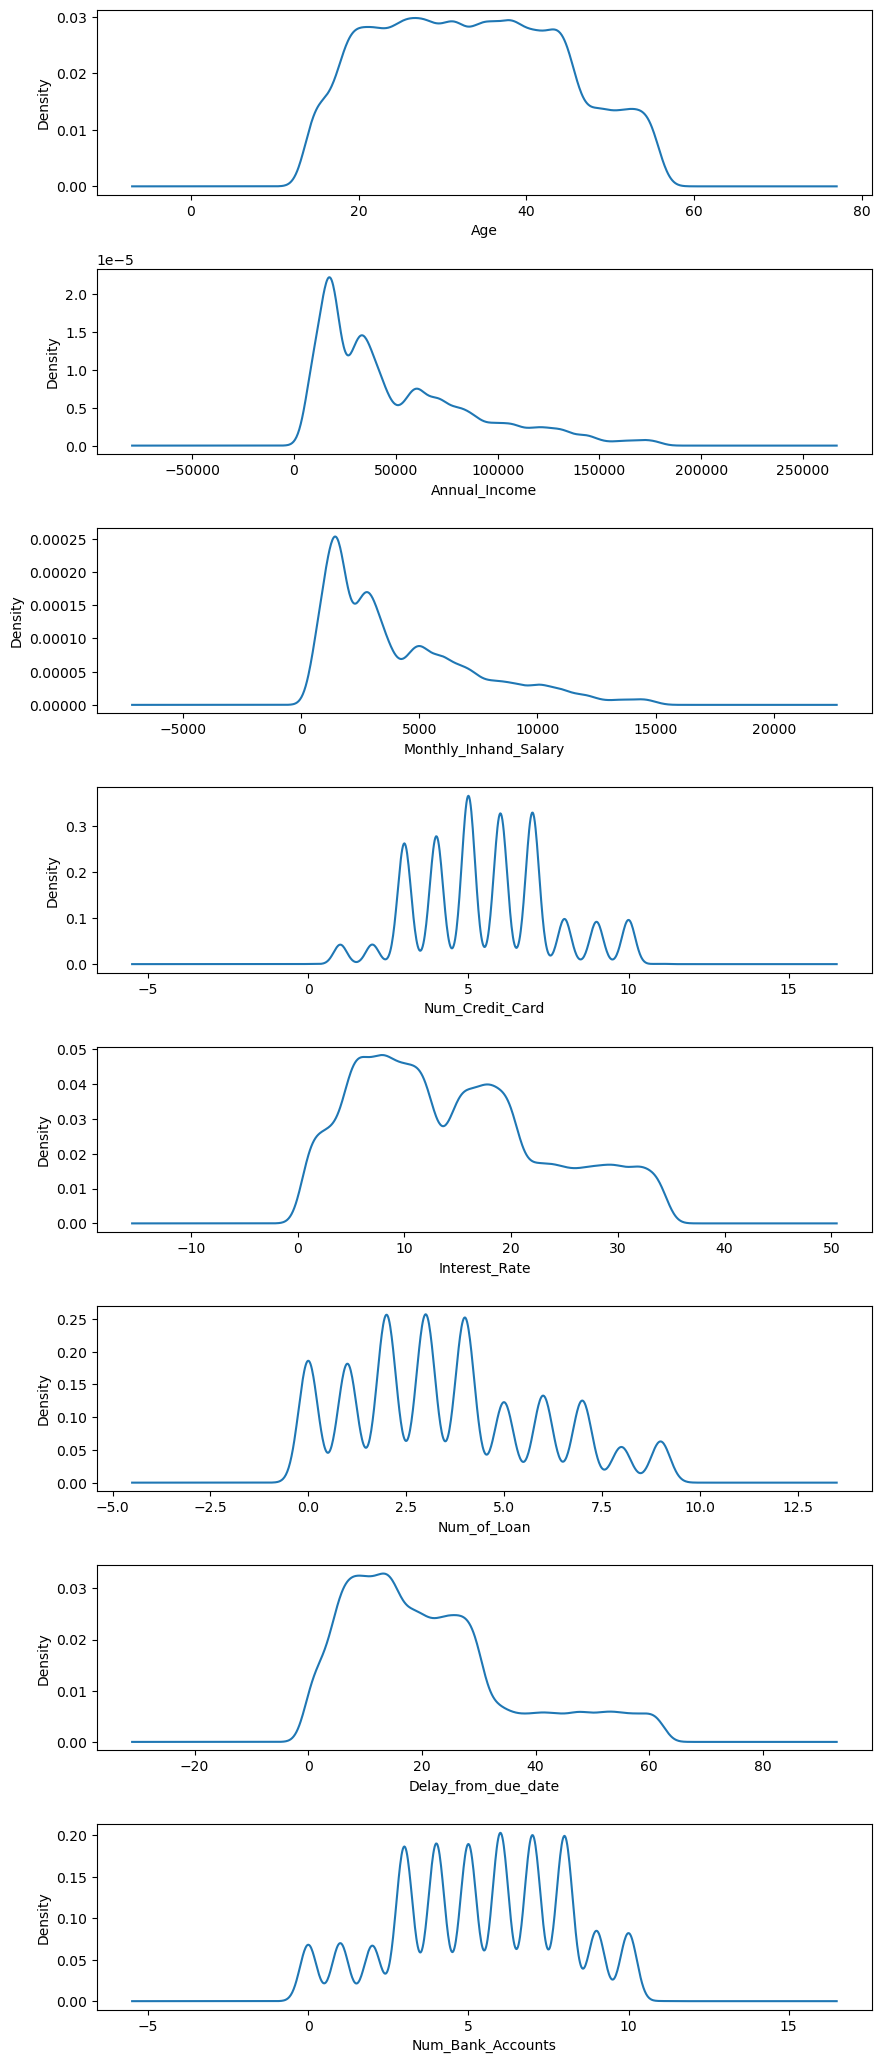

In [17]:
#Choose betweeen the three lists [to_describe, to_describe_2, to_describe_3]


current_describe = to_describe #change this variable

fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10,10))
plt.subplots_adjust(bottom=1,
                    top=3,
                    hspace=0.4)
for i in range(len(current_describe)):
    plt1 = df[current_describe[i]].plot.kde(ax=axes[i])
    plt1.set_xlabel(current_describe[i])
    
    "uncomment the follwing two lines of code if you want to save plots as photos in the current directory"
    
    #plt1.get_window_extent()
    #plt.savefig('{}'.format(to_describe[i]))
    #plt.show()


### Selected variabels for our hypothesis and showing the relationship between variables and target score

In [18]:
hypothesis_variables = ['Amount_invested_monthly', 'Interest_Rate', 'Annual_Income', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_of_Loan']
hypothesis_df = df.groupby('Credit_Score')[hypothesis_variables].mean()
hypothesis_df

,Amount_invested_monthly,Interest_Rate,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_of_Loan
Credit_Score,,,,,,
Good,67.417611,7.662329,65203.672105,10.958997,8.564842,2.202154
Poor,47.033019,20.187116,40584.515325,29.728809,15.809883,4.755742
Standard,55.371927,13.751420,50987.164840,19.759431,13.543518,3.312164


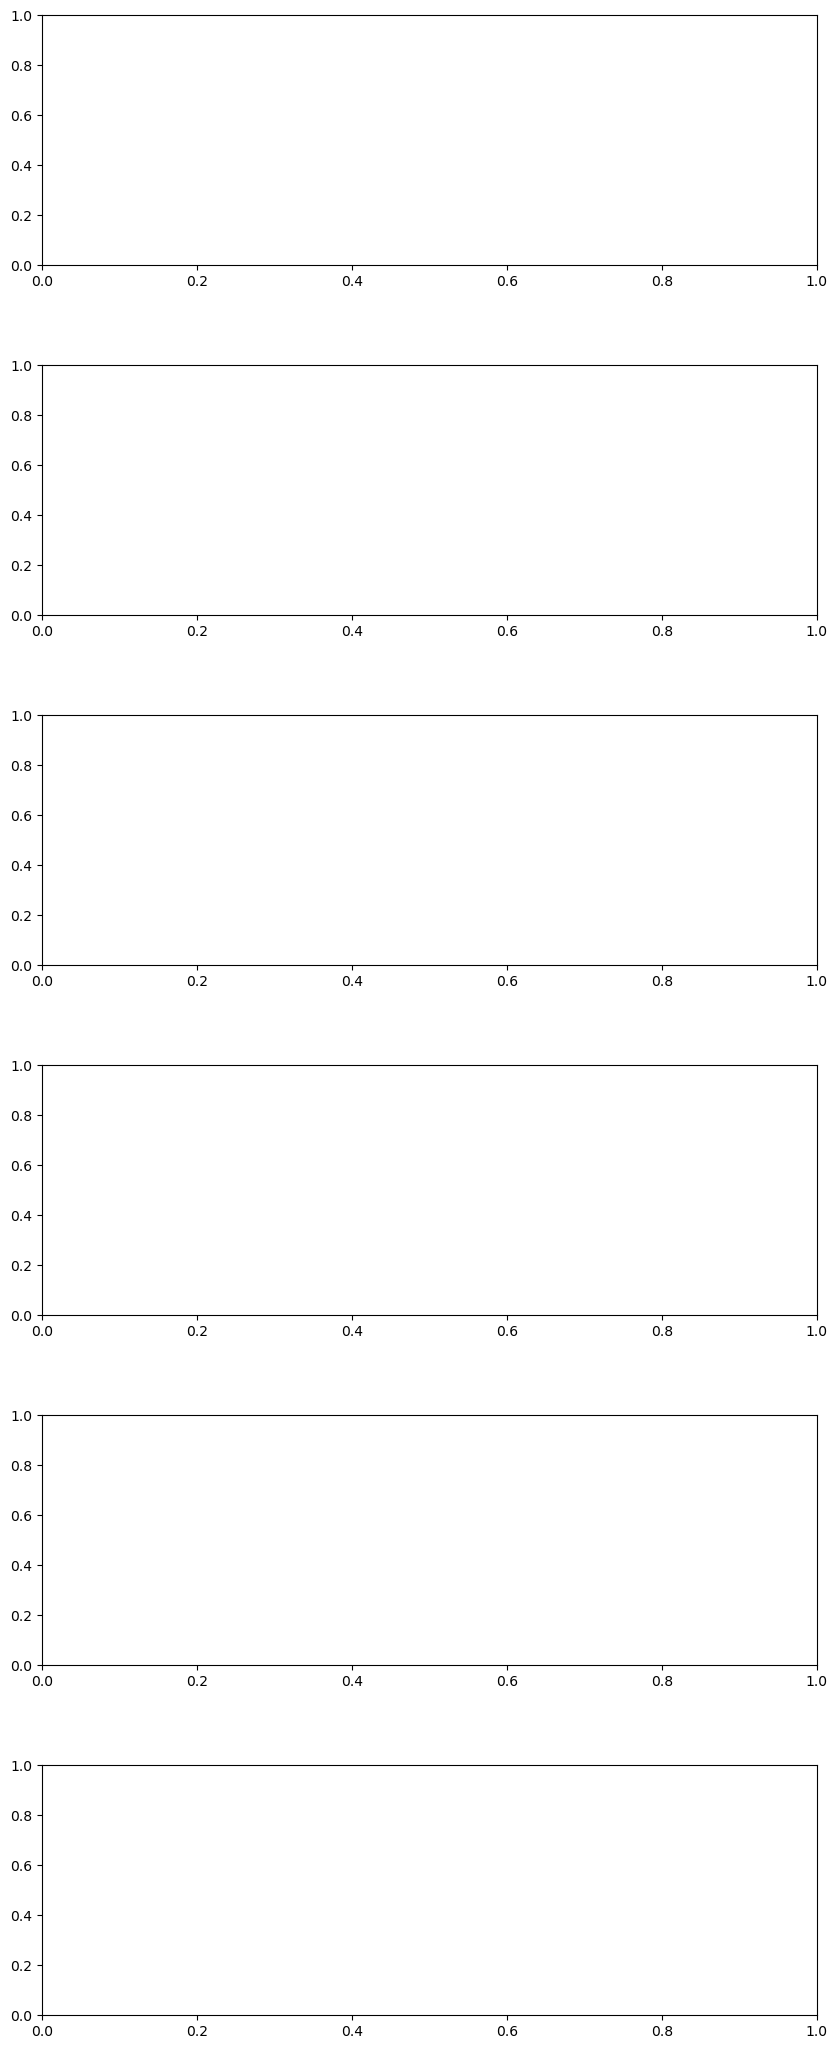

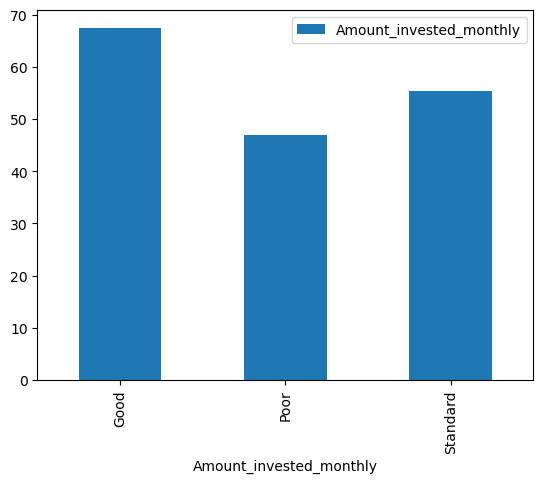

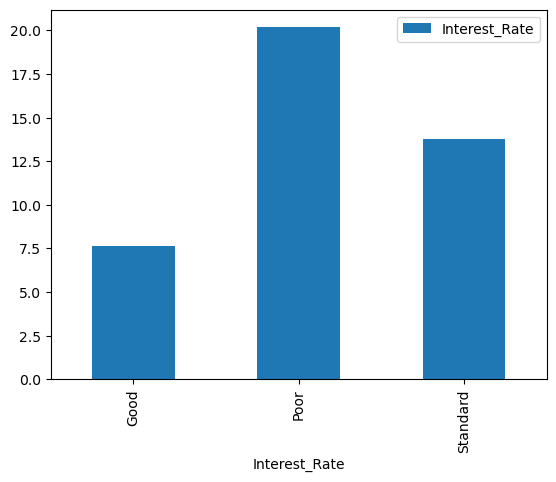

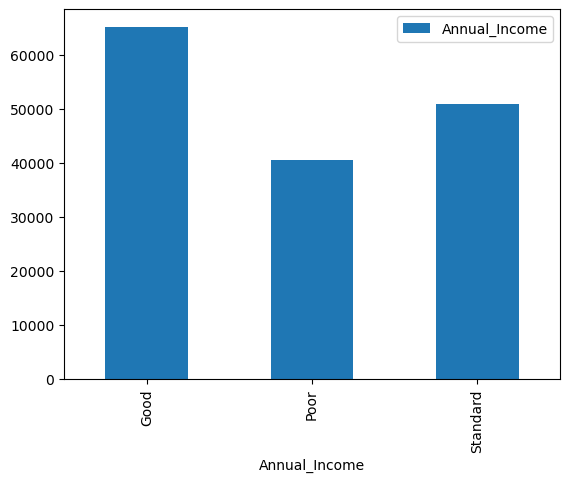

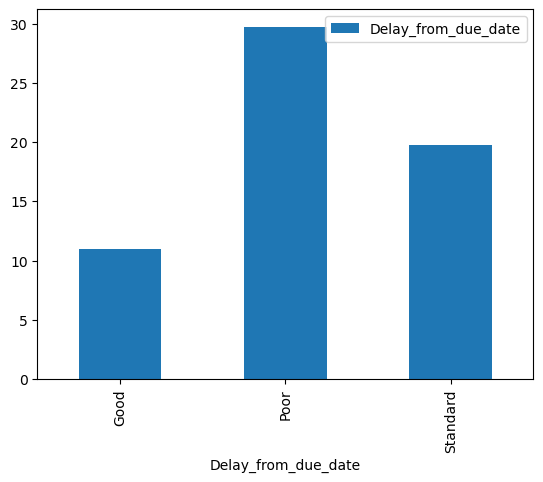

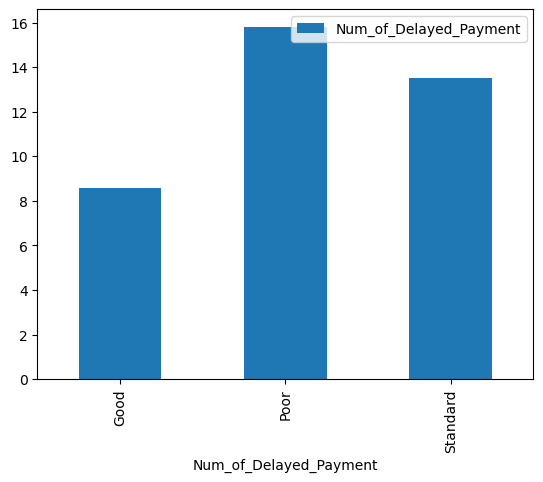

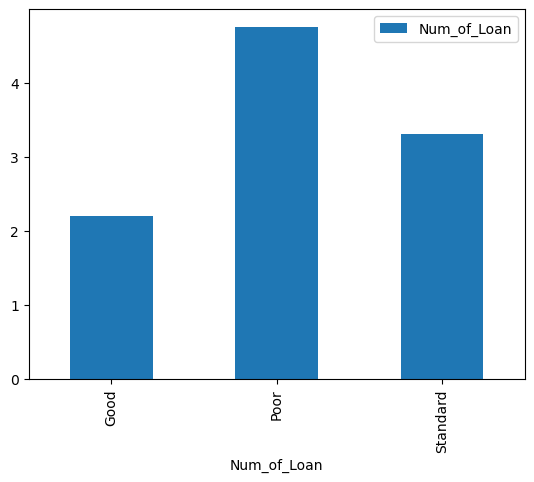

In [19]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10,10))
plt.subplots_adjust(bottom=1,
                    top=3,
                    hspace=0.4)
for i in range(len(hypothesis_variables)):
    plt1 = hypothesis_df.plot.bar(y=hypothesis_variables[i], use_index=True)
    plt1.set_xlabel(hypothesis_variables[i])
    
    "uncomment the follwing to lines of code if you want to save plots as photos in the current directory"
    plt1.get_window_extent()
    plt.savefig('{}'.format(hypothesis_variables[i]))

### Showing other variables realtionship to the credit score

In [20]:
df_new = df
df_new['Type_of_Loan_list'] = df_new['Type_of_Loan'].str.replace('and','')
df_new['Type_of_Loan_list'] = df_new['Type_of_Loan_list'].str.split(',')
df_new = df_new.explode('Type_of_Loan_list')
df_new['Type_of_Loan_list'] = df_new['Type_of_Loan_list'].str.strip()


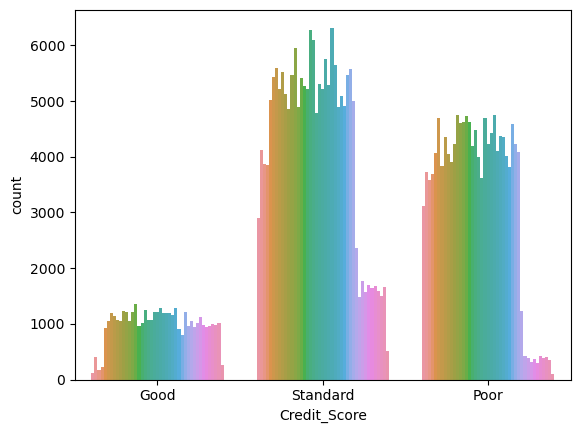

In [21]:
x = sns.countplot(x='Credit_Score', hue='Age', data=df_new)
x.legend_.remove()
#y = sns.countplot(x='Credit_Score', hue='Occupation', data=df_new)
#y.legend_.remove()
#z = sns.countplot(x='Credit_Score', hue='Type_of_Loan_list', data=df_new)


### Feature extraction using SelectKBest and mutual info classification

In [24]:
y = df['Credit_Score']
x = df.drop(['ID', 'Customer_ID', 'Name',  'SSN', 'Occupation','Type_of_Loan','Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

model = Perceptron()
model.fit(x,y)

selector = SelectKBest(mutual_info_classif, k = 6)
selector.fit(x,y)
x_new = selector.transform(x)

model_2 = Perceptron()
model.fit(x_new, y)


Perceptron()

### The extracted features

In [6]:
selector.get_feature_names_out()

array(['Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate',
       'Outstanding_Debt', 'Total_EMI_per_month',
       'Amount_invested_monthly'], dtype=object)

In [ ]:
|